# 神经网络(Neual Network)

In [140]:
import  tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as  opt
import scipy.io as sio

In [141]:
def load_data(path, transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')  # (5000,1)
    y = y.reshape(y.shape[0])  # make it back to column vector

    X = data.get('X')  # (5000,400)

    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([im.reshape((20, 20)).T for im in X])

        # and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])

    return X, y

In [142]:
(train_images, train_labels) = load_data('./ex3data1.mat')

这是数字: 5


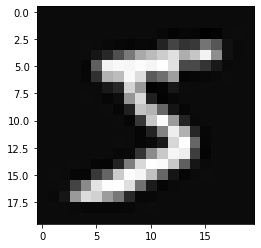

In [143]:
pick_one = np.random.randint( 0 , 5000) 
plt.imshow(train_images[pick_one].reshape((20,20)), "gray")
print("这是数字:" , train_labels[pick_one])

准备数据,为每个样本数据添加一个偏置层 $\theta_0$


In [144]:
X = np.insert(train_images , 0 ,values = np.ones(train_images.shape[0]) , axis = 1)
X.shape

(5000, 401)

向量化标签

In [145]:
# y have 10 categories here. 1..10, they represent digit 0 as category 10 because matlab index start at 1
# I'll ditit 0, index 0 again
y_matrix = []

for k in range(1, 11):
    y_matrix.append((train_labels == k).astype(int))    # 见配图 "向量化标签.png"

# last one is k==10, it's digit 0, bring it to the first position，最后一列k=10，都是0，把最后一列放到第一列
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

y.shape

# 扩展 5000*1 到 5000*10
#     比如 y=10 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]: ndarray
#     """

(10, 5000)

# 逻辑回归(Logistic regression)

激活函数:sigmoid 
$$
    \sigma (z) = \frac{1}{1+e^(-z)}
$$

In [146]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

损失函数:
$
    J(\theta) = \frac{1}{m}\sum_{i = 1}^m[-y^{i}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log( 1 - h_{\theta}(x^{(i)}))]
$

In [147]:
def cost (theta, X , y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - ( 1 - y) * np.log(1- sigmoid(X @ theta))) 

In [148]:
def regularized_cost(theta, X ,y , lamda = 1):
    theta_j1_to_n = theta[1:]
    regulaized_term = lamda / (2 * len(X)) * np.sum( theta_j1_to_n **2)
    return cost(theta , X , y) + regulaized_term

梯度 
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})- y^{(i)})x_j^{(i)} )
$$

In [149]:
def gradient(theta , X , y) : 
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)    

In [150]:
def regularized_gradient(theta, X , y , lamda = 1) : 
    theta_j1_to_n = theta[1:]
    regularized_theta = (1/len(X)) * theta_j1_to_n 
    regularized_term = np.concatenate([np.array([0]) , regularized_theta])
    return gradient(theta, X , y) + regularized_term 

In [151]:
def logistic_regression(X , y , l = 1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun = regularized_cost , x0 = theta , args=(X,y,l),method="TNC" , jac=regularized_gradient , options={'disp':True})
    final_theta = res.x 
    return final_theta

In [152]:
def predict(x , theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [153]:
# Trainning

k_theta = np.array([logistic_regression(X , y[k]) for k in range(10)])
print(k_theta.shape)

(10, 401)


In [154]:
# 进行预测
prob_matrix = sigmoid( X @ k_theta.T)
print(X.shape , k_theta.T.shape , prob_matrix.shape)
y_pred = np.argmax(prob_matrix, axis=1)#返回沿轴axis最大值的索引，axis=1代表行

(5000, 401) (401, 10) (5000, 10)


In [155]:
y_answer = train_labels.copy()
y_answer[y_answer==10] = 0

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_answer , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



# 神经网络模型图示

<img style="float: left;" src="./nn_model.png">

# 前馈预测(feed forward prediction)

In [157]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']
theta1 , theta2 = load_weight('ex3weights.mat')
theta1.shape , theta2.shape

((25, 401), (10, 26))

In [158]:
train_images , train_labels = load_data("ex3data1.mat"  ,transpose=False)
X  = np.insert(train_images , 0 , values = np.ones(X.shape[0]) , axis = 1)
y = train_labels 
X.shape , y.shape

((5000, 401), (5000,))

In [159]:
a1 = X 

In [160]:
z2 = a1 @ theta1.T
z2.shape

(5000, 25)

In [161]:
z2 = np.insert(z2 , 0 ,values = np.ones(z2.shape[0]) , axis = 1)

In [162]:
a2 = sigmoid(z2)
a2.shape

(5000, 26)

In [163]:
z3 = a2 @ theta2.T 
z3.shape

(5000, 10)

In [164]:
a3 = sigmoid(z3)
a3

array([[1.38245045e-04, 2.05540079e-03, 3.04012453e-03, ...,
        4.91017499e-04, 7.74325818e-03, 9.96229459e-01],
       [5.87756717e-04, 2.85026516e-03, 4.14687943e-03, ...,
        2.92311247e-03, 2.35616705e-03, 9.96196668e-01],
       [1.08683616e-04, 3.82659802e-03, 3.05855129e-02, ...,
        7.51453949e-02, 6.57039547e-03, 9.35862781e-01],
       ...,
       [6.27824726e-02, 4.50406476e-03, 3.54510925e-02, ...,
        2.63669734e-03, 6.89448164e-01, 2.74369466e-05],
       [1.01908736e-03, 7.34360211e-04, 3.78558700e-04, ...,
        1.45616578e-02, 9.75989758e-01, 2.33374461e-04],
       [5.90807037e-05, 5.41717668e-04, 2.58968308e-05, ...,
        7.00508308e-03, 7.32814653e-01, 9.16696059e-02]])

In [165]:
y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
y_pred.shape

(5000,)

In [166]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

